# Примеры запуска основных методов библиотеки scikit-learn для задачи классификации и регрессии

## (c) Виктор Владимирович Китов 
## v.v.kitov(at)yandex.ru

Для выполнения кода потребуются python и библиотеки numpy, matplotlib и sklearn.

Рекомендуется использование менеджера пакетов [Anaconda](https://www.anaconda.com/download), где эти пакеты уже установлены по умолчанию.

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

# Генерация данных для классификации и регрессии

In [2]:
import numpy as np
from sklearn.datasets import make_moons

def get_demo_classification_data():
    X,Y = make_moons(n_samples=3000, noise=0.3 ,random_state=0)   # генерируем данные для классификации
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, stratify=Y, random_state=0)   # разбиваем выборку на обучающую (60%) и тестовую (40%) 
    return X_train, X_test, Y_train, Y_test    
    
def get_demo_regression_data():
    np.random.seed(0)
    X = np.random.normal(size=[3000,5])
    NOISE = 0.3*np.random.normal(size=[3000])
    Y = X.mean(axis=1)+(X**2).mean(axis=1)+NOISE    # генерируем данные для регрессии
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)   # разбиваем выборку на обучающую (60%) и тестовую (40%) 
    return X_train, X_test, Y_train, Y_test

In [3]:
X_train, X_test, Y_train, Y_test = get_demo_classification_data()
#X_train, X_test, Y_train, Y_test = get_demo_regression_data()

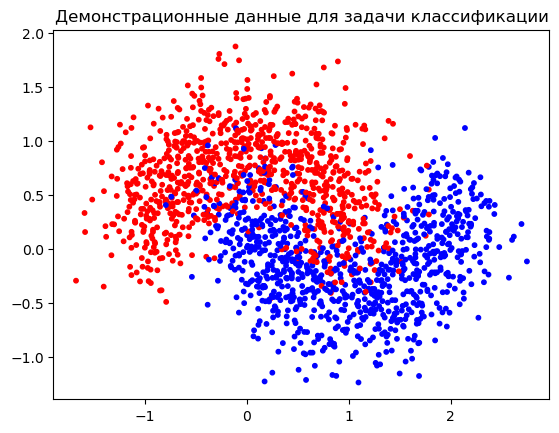

In [4]:
cmap = matplotlib.colors.ListedColormap(['r', 'b'])  # 'r' для класса 1; 'b' для класса 2
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=cmap, s=10)
plt.title('Демонстрационные данные для задачи классификации');

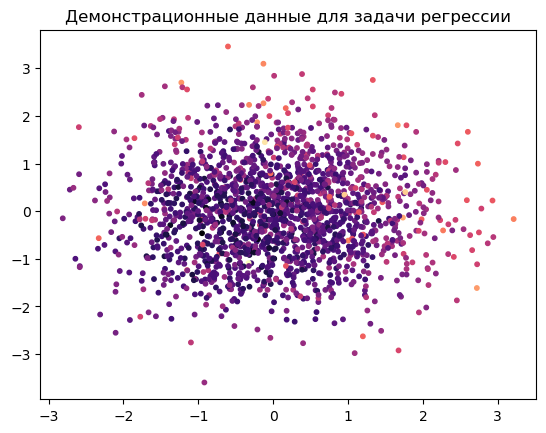

In [5]:
X_train, X_test, Y_train, Y_test = get_demo_regression_data()
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='magma', s=10)
plt.title('Демонстрационные данные для задачи регрессии');

# Примеры использования методов машинного обучения

## Метод ближайших центроидов

### Классификация

In [6]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = NearestCentroid()      # инициализация модели
model.fit(X_train,Y_train);    # обучение модели
Y_hat = model.predict(X_test)  # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

# Больше информации: https://scikit-learn.org/stable/modules/neighbors.html#nearest-centroid-classifier

Точность прогнозов: 79.3%


## Метод K ближайших соседей

### Классификация

In [7]:
# Для задачи классификации.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = KNeighborsClassifier(n_neighbors=3)    # инициализация модели
model.fit(X_train,Y_train)                     # обучение модели                
Y_hat = model.predict(X_test)                  # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

P_hat = model.predict_proba(X_test)  # можно предсказывать вероятности классов

loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')
# Больше информации: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

Точность прогнозов: 89.8%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.08


### Регрессия

In [8]:
# Для задачи классификации.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_regression_data()  
model = KNeighborsRegressor(n_neighbors=3)     # инициализация модели
model.fit(X_train,Y_train)                     # обучение модели                
Y_hat = model.predict(X_test)                  # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')  

# Больше информации: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression

Средний модуль ошибки (MAE): 0.36


# Линейная регрессия без регуляризации

### Регрессия

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_regression_data()  
model = LinearRegression()    # инициализация модели
model.fit(X_train,Y_train)                     # обучение модели                
Y_hat = model.predict(X_test)                  # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')  

# Больше информации: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

Средний модуль ошибки (MAE): 0.54


## Гребневая регрессия (линейная с L2 регуляризацией)

### Регрессия

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_regression_data()  
model = Ridge(alpha=1)    # инициализация модели, alpha - вес при регуляризаторе
model.fit(X_train,Y_train)                     # обучение модели                
Y_hat = model.predict(X_test)                  # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')  

# Больше информации: https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

Средний модуль ошибки (MAE): 0.54


## LASSO-регрессия (линейная с L1 регуляризацией)

### Регрессия

In [11]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_regression_data()  
model = Lasso(alpha=1)        # инициализация модели, alpha - вес при регуляризаторе
model.fit(X_train,Y_train)      # обучение модели                
Y_hat = model.predict(X_test)   # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')  

# Больше информации: https://scikit-learn.org/stable/modules/linear_model.html#lasso

Средний модуль ошибки (MAE): 0.64


## Логистическая регрессия

### Классификация

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = LogisticRegression(C=1, penalty='l2')    # инициализация модели, (1/C) - вес при регуляризаторе
model.fit(X_train, Y_train)     # обучение модели   
Y_hat = model.predict(X_test)   # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

P_hat = model.predict_proba(X_test)  # можно предсказывать вероятности классов

loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')

# Больше информации: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Точность прогнозов: 85.6%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.10


## Метод опорных векторов

### Классификация

In [13]:
from sklearn.svm import SVC   
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = SVC(C=1)                 # инициализация модели, (1/C) - вес при регуляризаторе
model.fit(X_train, Y_train)     # обучение модели   
Y_hat = model.predict(X_test)   # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

# Можно считать информацию по опорным векторам:
print(f'Число опорных векторов к каждом классе: {model.n_support_}')
print(model.support_vectors_[:5])   # выводим первые 5 опорных векторов

model = SVC(kernel='rbf', gamma=1)   # инициализация модели с использованием Гауссова ядра
model.fit(X_train, Y_train)          # обучение модели   
Y_hat = model.predict(X_test)        # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  


# Больше информации: https://scikit-learn.org/stable/modules/svm.html

Точность прогнозов: 91.6%
Число опорных векторов к каждом классе: [223 223]
[[-0.07326982  0.47444267]
 [ 0.19420116  0.61043817]
 [ 1.50204109  0.36798645]
 [-0.06857169  0.49566463]
 [-0.3618713   0.45282452]]
Точность прогнозов: 91.4%


## Решающее дерево

### Классификация

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = DecisionTreeClassifier(criterion='gini')  # инициализация дерева, criterion - функция неопределённости
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')

P_hat = model.predict_proba(X_test)  # можно предсказывать вероятности классов
loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')

# Больше информации: https://scikit-learn.org/stable/modules/tree.html#classification

Точность прогнозов: 88.0%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.12


### Регрессия

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_regression_data()  
model = DecisionTreeRegressor(criterion='absolute_error')  # инициализация дерева, criterion - функция неопределённости
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')  

# Больше информации: https://scikit-learn.org/stable/modules/tree.html#regression

Средний модуль ошибки (MAE): 0.42


## Голосование по большинству и усредняющий ансамбль

### Классификация

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()

# Инициализируем базовые модели и проверим их качество
log_model = LogisticRegression()    # инициализация модели
log_model.fit(X_train, Y_train)     # обучение модели   
Y_hat = log_model.predict(X_test)   # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

tree_model = DecisionTreeClassifier()  # инициализация дерева
tree_model.fit(X_train, Y_train)       # обучение модели   
Y_hat = tree_model.predict(X_test)     # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

# Инициализируем ансамбль голосования по большинству (для меток классов)
ensemble = VotingClassifier(estimators=[('logistic regression', log_model), ('decision tree', tree_model)], voting='hard', weights=[0.5,0.5])
ensemble.fit(X_train, Y_train)     # обучение базовых моделей ансамбля
Y_hat = ensemble.predict(X_test)   # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

# Инициализируем ансамбль, усредняющий вероятности классов
ensemble = VotingClassifier(estimators=[('logistic regression', log_model), ('decision tree', tree_model)], voting='soft', weights=[0.5,0.5])
ensemble.fit(X_train, Y_train)     # обучение базовых моделей ансамбля
Y_hat = ensemble.predict(X_test)   # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

P_hat = ensemble.predict_proba(X_test)  # можно предсказывать вероятности классов
loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

Точность прогнозов: 85.6%
Точность прогнозов: 87.9%
Точность прогнозов: 86.5%
Точность прогнозов: 88.0%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.08


### Регрессия

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_classification_data()

# Инициализируем базовые модели и проверим их качество
knn = KNeighborsRegressor(n_neighbors=100)    # инициализация модели
log_model.fit(X_train, Y_train)     # обучение модели   
Y_hat = log_model.predict(X_test)   # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')   

tree_model = DecisionTreeRegressor()  # инициализация дерева
tree_model.fit(X_train, Y_train)     # обучение модели   
Y_hat = tree_model.predict(X_test)   # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')    

# Инициализируем усредняющий ансамбль
ensemble = VotingRegressor(estimators=[('K nearest neighbours', knn), ('decision tree', tree_model)], weights=[0.5,0.5])
ensemble.fit(X_train, Y_train)     # обучение базовых моделей ансамбля
Y_hat = ensemble.predict(X_test)   # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')   

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor

Средний модуль ошибки (MAE): 0.14
Средний модуль ошибки (MAE): 0.12
Средний модуль ошибки (MAE): 0.13


## Стэкинг

### Классификация

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()

# Инициализируем базовые модели и проверим их качество
knn = KNeighborsClassifier(n_neighbors=100)    # инициализация модели
knn.fit(X_train, Y_train)     # обучение модели   
Y_hat = knn.predict(X_test)   # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

tree_model = DecisionTreeClassifier()  # инициализация дерева
tree_model.fit(X_train, Y_train)       # обучение модели   
Y_hat = tree_model.predict(X_test)     # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

# Инициализируем ансамбль голосования по большинству (для меток классов)
ensemble = StackingClassifier(estimators=[('K nearest neighbors', knn), ('decision tree', tree_model)], 
                              final_estimator=LogisticRegression(),
                              cv=3,        # количество блоков кросс-валидации при настройке стэкинга
                              n_jobs=-1)   # используем все ядра процессора для настройки
ensemble.fit(X_train, Y_train)     # обучение базовых моделей` ансамбля
Y_hat = ensemble.predict(X_test)   # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')  

P_hat = ensemble.predict_proba(X_test)  # можно предсказывать вероятности классов
loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#stacked-generalization

Точность прогнозов: 91.5%
Точность прогнозов: 87.8%
Точность прогнозов: 91.5%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.06


### Регрессия

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()

# Инициализируем базовые модели и проверим их качество
knn = KNeighborsRegressor(n_neighbors=100)    # инициализация модели
knn.fit(X_train, Y_train)     # обучение модели   
Y_hat = log_model.predict(X_test)   # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')   

tree_model = DecisionTreeRegressor()  # инициализация дерева
tree_model.fit(X_train, Y_train)       # обучение модели   
Y_hat = tree_model.predict(X_test)     # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')   

# Инициализируем ансамбль голосования по большинству (для меток классов)
ensemble = StackingRegressor(estimators=[('K nearest neighbors', knn), ('decision tree', tree_model)], 
                              final_estimator=Ridge(),
                              cv=3,        # количество блоков кросс-валидации при настройке стэкинга
                              n_jobs=-1)   # используем все ядра процессора для настройки
ensemble.fit(X_train, Y_train)     # обучение базовых моделей ансамбля
Y_hat = ensemble.predict(X_test)   # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')   

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#stacked-generalization

Средний модуль ошибки (MAE): 0.14
Средний модуль ошибки (MAE): 0.12
Средний модуль ошибки (MAE): 0.13


## Бэггинг, метод случайных подпространств

### Классификация

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.8, max_features=1.0, n_jobs=-1)  # инициализация модели
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')

P_hat = model.predict_proba(X_test)  # можно предсказывать вероятности классов
loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator

Точность прогнозов: 89.3%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.08


### Регрессия

In [21]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = BaggingRegressor(DecisionTreeRegressor(), max_samples=0.8, max_features=1.0, n_jobs=-1)  # инициализация модели
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')   

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator

Средний модуль ошибки (MAE): 0.12


## Случайный лес

### Классификация

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features=0.5, n_jobs=-1)  # инициализация модели
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')

P_hat = model.predict_proba(X_test)  # можно предсказывать вероятности классов
loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#random-forests

Точность прогнозов: 90.9%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.07


### Регрессия

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_regression_data()  
model = RandomForestRegressor(n_estimators=100, bootstrap=True, max_features=0.5, n_jobs=-1)  # инициализация модели
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')   

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#random-forests

Средний модуль ошибки (MAE): 0.29


## Особо случайные деревья

### Классификация

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features=0.5, n_jobs=-1)  # инициализация модели
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')

P_hat = model.predict_proba(X_test)  # можно предсказывать вероятности классов
loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees

Точность прогнозов: 91.1%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.07


### Регрессия

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_regression_data()  
model = ExtraTreesRegressor(n_estimators=100, bootstrap=True, max_features=0.5, n_jobs=-1)  # инициализация модели
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')   

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees

Средний модуль ошибки (MAE): 0.31


## AdaBoost

### Классификация

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = AdaBoostClassifier(n_estimators=50)   # инициализация бустинга AdaBoost (по умолчанию-над деревьями)
# существует отдельный алгоритм и для задачи регрессии - AdaBoostRegressor
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')

P_hat = model.predict_proba(X_test)  # можно предсказывать вероятности классов
loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#adaboost

Точность прогнозов: 91.6%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.19


## Градиентный бустинг над деревьями

### Классификация

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

X_train, X_test, Y_train, Y_test = get_demo_classification_data()  
model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, subsample=1.0, max_features=1.0)   # инициализация модели (базовые модели-всегда деревья)
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Точность прогнозов: {100*accuracy_score(Y_test, Y_hat):.1f}%')

P_hat = model.predict_proba(X_test)  # можно предсказывать вероятности классов
loss = brier_score_loss(Y_test, P_hat[:,1])  # считаем качество Бриера на вероятности положительного класса
print(f'Средняя ошибка прогноза вероятностей (по мере Бриера): {loss:.2f}')

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosted-trees

Точность прогнозов: 91.2%
Средняя ошибка прогноза вероятностей (по мере Бриера): 0.06


### Регрессия

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, Y_train, Y_test = get_demo_regression_data()  
model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, subsample=1.0, max_features=1.0)   # инициализация модели (базовые модели-всегда деревья)
model.fit(X_train, Y_train)       # обучение модели   
Y_hat = model.predict(X_test)     # построение прогнозов
print(f'Средний модуль ошибки (MAE): {mean_absolute_error(Y_test, Y_hat):.2f}')   

# Больше информации: https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosted-trees

Средний модуль ошибки (MAE): 0.31
